In [114]:
import geopandas as gpd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
file_path = "parks_with_taxizones_full_details_50_new.geojson"

kata = gpd.read_file(file_path)

data = pd.DataFrame(kata)


In [116]:
# Load the weather data
weather_data = pd.read_csv("CLEANED_WEATHER_DATA_2022.csv")

In [117]:
unique_parks= gpd.read_file("unique_parks_50_.geojson")

In [118]:
unique_parks

,park_id,park_name,geometry
0,PK1,"1 E 99th St, New York, NY 10029, USA","POLYGON ((-73.94236 40.78551, -73.94267 40.785..."
1,PK10,"400 Riverside Dr, New York, NY 10025, USA","POLYGON ((-73.96806 40.80508, -73.96805 40.805..."
2,PK101,Inwood Hill Park,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
3,PK102,Irish Hunger Memorial,"POLYGON ((-74.01610 40.71514, -74.01607 40.715..."
4,PK103,Isham Park,"POLYGON ((-73.91930 40.86841, -73.91977 40.869..."
...,...,...,...
205,PK95,Highbridge Park,"MULTIPOLYGON (((-73.94099 40.83087, -73.94050 ..."
206,PK96,Hillman Park,"POLYGON ((-73.98250 40.71526, -73.98241 40.715..."
207,PK97,Holcombe Rucker Park,"POLYGON ((-73.93522 40.82840, -73.93702 40.829..."
208,PK98,Howard Bennett Playground,"POLYGON ((-73.93900 40.81411, -73.93791 40.813..."


In [119]:
data

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,1,11,5,True,Winter,True,3,2.104281e+06,1.319376e+06,0.373004,1.119011,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,1,17,5,True,Winter,True,6,2.104281e+06,1.319376e+06,0.373004,2.238022,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,1,19,5,True,Winter,True,6,2.104281e+06,1.319376e+06,0.373004,2.238022,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,10,12,0,False,Winter,False,1,2.104281e+06,1.319376e+06,0.373004,0.373004,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,10,13,0,False,Winter,False,1,2.104281e+06,1.319376e+06,0.373004,0.373004,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,PK99,Hudson River Park,44860.653005,2022,9,9,18,4,False,Autumn,False,18,1.947489e+06,1.812907e+06,0.256270,1.441739,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721..."
336361,PK99,Hudson River Park,44860.653005,2022,9,9,19,4,False,Autumn,False,67,1.947489e+06,1.812907e+06,0.256270,4.347650,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721..."
336362,PK99,Hudson River Park,44860.653005,2022,9,9,20,4,False,Autumn,False,14,1.947489e+06,1.812907e+06,0.256270,1.066909,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721..."
336363,PK99,Hudson River Park,44860.653005,2022,9,9,8,4,False,Autumn,False,29,1.947489e+06,1.812907e+06,0.256270,1.904388,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721..."


In [120]:
# Print the data types of the specific columns
print(data[['weekend', 'isHoliday?']].dtypes)


weekend       bool
isHoliday?    bool
dtype: object


In [121]:
# Convert 'weekend' and 'isHoliday?' columns to string to use map function
data['weekend'] = data['weekend'].astype(str).map({'True': 1, 'False': 0})
data['isHoliday?'] = data['isHoliday?'].astype(str).map({'True': 1, 'False': 0})

# Verify the conversion
print(data[['weekend', 'isHoliday?']])


        weekend  isHoliday?
0             1           1
1             1           1
2             1           1
3             0           0
4             0           0
...         ...         ...
336360        0           0
336361        0           0
336362        0           0
336363        0           0
336364        0           0

[336365 rows x 2 columns]


In [122]:
print(data['season'].unique())


['Winter' 'Autumn' 'Spring' 'Summer']


In [123]:
print(data['season'])


0         Winter
1         Winter
2         Winter
3         Winter
4         Winter
           ...  
336360    Autumn
336361    Autumn
336362    Autumn
336363    Autumn
336364    Autumn
Name: season, Length: 336365, dtype: object


In [124]:
data['season'] = data['season'].astype(str).map({'Spring': 1, 'Autumn': 2, 'Summer': 3, 'Winter': 4})
print(data['season'])


0         4
1         4
2         4
3         4
4         4
         ..
336360    2
336361    2
336362    2
336363    2
336364    2
Name: season, Length: 336365, dtype: int64


In [125]:


print(data.columns)


Index(['park_id', 'park_name', 'park_area', 'year', 'month', 'day', 'hour',
       'day_of_week', 'weekend', 'season', 'isHoliday?', 'taxi_zone_busyness',
       'taxi_zone_area', 'remaining_taxi_zone_area', 'park_proportion',
       'park_busyness', 'taxi_zone_ids', 'taxi_zones', 'geometry'],
      dtype='object')


In [126]:


# Select relevant columns for correlation analysis
numerical_columns = ['park_area', 'taxi_zone_busyness', 'taxi_zone_area', 'remaining_taxi_zone_area', 'park_proportion', 'park_busyness']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                          park_area  taxi_zone_busyness  taxi_zone_area  \
park_area                  1.000000            0.011474        0.276456   
taxi_zone_busyness         0.011474            1.000000        0.255966   
taxi_zone_area             0.276456            0.255966        1.000000   
remaining_taxi_zone_area  -0.005549            0.222804        0.949924   
park_proportion            0.450347            0.330329        0.596888   
park_busyness              0.385668            0.508580        0.488498   

                          remaining_taxi_zone_area  park_proportion  \
park_area                                -0.005549         0.450347   
taxi_zone_busyness                        0.222804         0.330329   
taxi_zone_area                            0.949924         0.596888   
remaining_taxi_zone_area                  1.000000         0.387894   
park_proportion                           0.387894         1.000000   
park_busyness                             0.3127

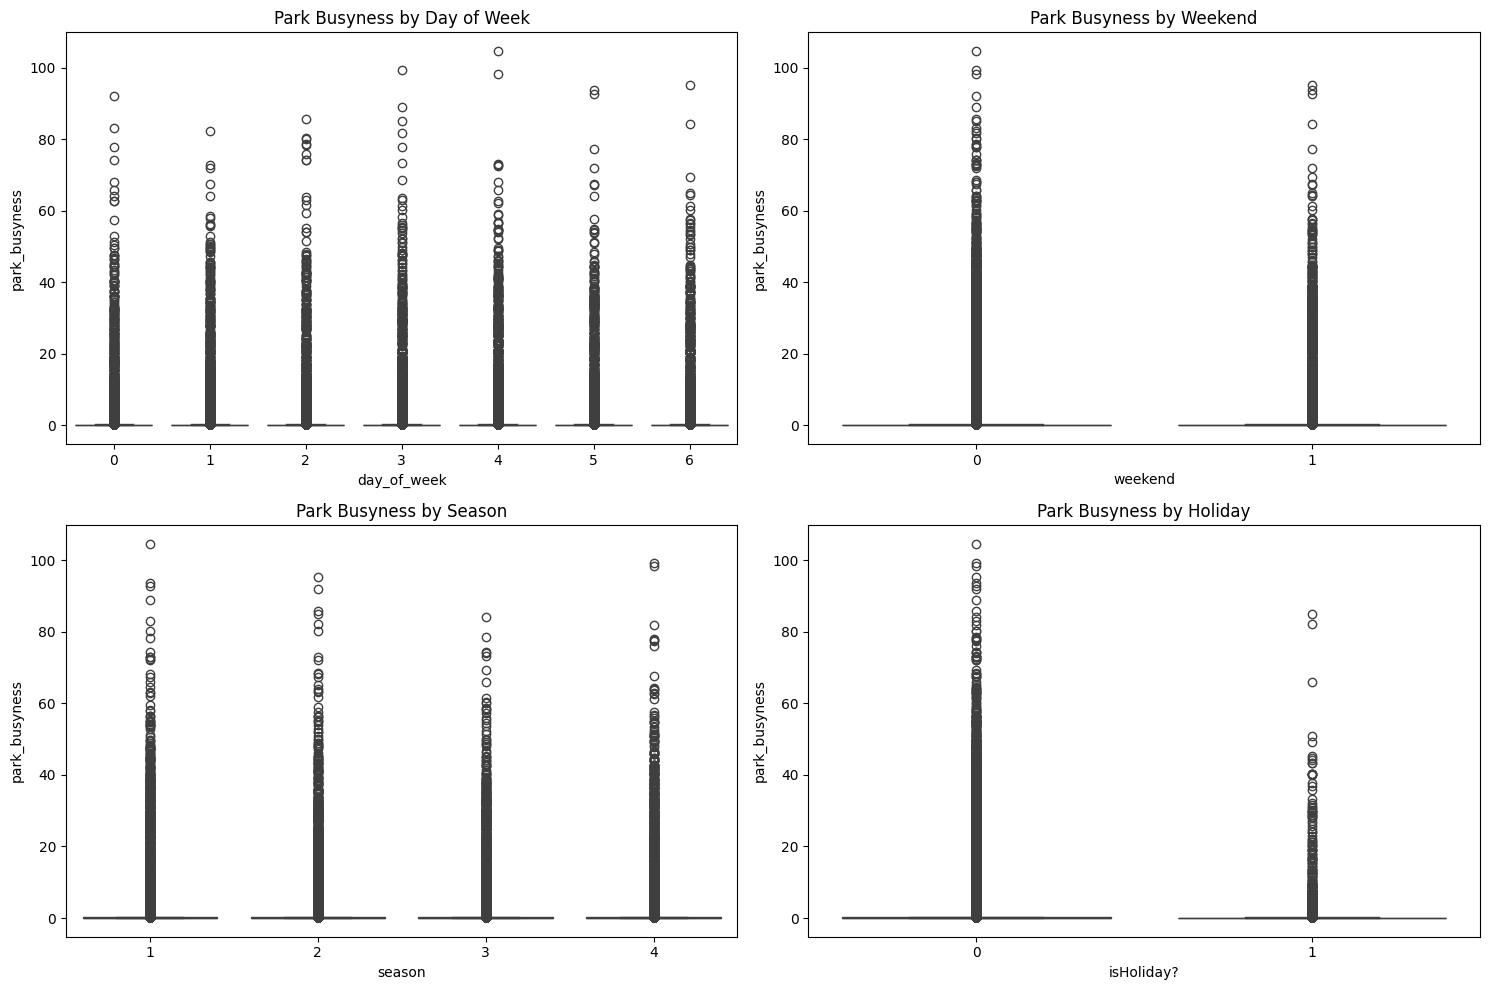

In [127]:


# Convert categorical columns to category dtype
categorical_columns = ['day_of_week', 'weekend', 'season', 'isHoliday?']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Plotting park busyness against categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Day of week vs Park Busyness
sns.boxplot(ax=axes[0, 0], x='day_of_week', y='park_busyness', data=data)
axes[0, 0].set_title('Park Busyness by Day of Week')

# Weekend vs Park Busyness
sns.boxplot(ax=axes[0, 1], x='weekend', y='park_busyness', data=data)
axes[0, 1].set_title('Park Busyness by Weekend')

# Season vs Park Busyness
sns.boxplot(ax=axes[1, 0], x='season', y='park_busyness', data=data)
axes[1, 0].set_title('Park Busyness by Season')

# Is Holiday vs Park Busyness
sns.boxplot(ax=axes[1, 1], x='isHoliday?', y='park_busyness', data=data)
axes[1, 1].set_title('Park Busyness by Holiday')

plt.tight_layout()
plt.show()


In [128]:
# Create a datetime column in the parks data
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])


In [129]:
# Convert the 'dt_iso' column to string type
weather_data['dt_iso'] = weather_data['dt_iso'].astype(str)

# Remove timezone information and extra characters from 'dt_iso'
weather_data['dt_iso'] = weather_data['dt_iso'].str.replace(' +0000 UTC', '', regex=False)

# Verify the changes
print(weather_data['dt_iso'].head())


0    2022-01-01 00:00:00
1    2022-01-01 01:00:00
2    2022-01-01 02:00:00
3    2022-01-01 03:00:00
4    2022-01-01 04:00:00
Name: dt_iso, dtype: object


In [130]:
# Convert the dt_iso column in the weather data to datetime with specified format
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], format='%Y-%m-%d %H:%M:%S')

# Display the first few rows to verify
print(weather_data.head())


               dt_iso   temp  temp_min  temp_max  rain_1h  rain_3h
0 2022-01-01 00:00:00  10.06      8.67      11.0      0.0      0.0
1 2022-01-01 01:00:00  10.06      8.67      11.0      0.0      0.0
2 2022-01-01 02:00:00  10.22      8.67      11.0      0.0      0.0
3 2022-01-01 03:00:00  10.13      8.67      11.0      0.0      0.0
4 2022-01-01 04:00:00  10.13      8.67      11.0      0.0      0.0


In [131]:
print(data['datetime'].dtypes)
print(weather_data['dt_iso'].dtypes)


datetime64[ns]
datetime64[ns]


In [132]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']], errors='coerce')
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [133]:

# Merge the datasets on the datetime column
merged_data = pd.merge(data, weather_data, left_on='datetime', right_on='dt_iso', how='inner')


In [134]:
# Reset display options to default
pd.reset_option('display.max_columns')


In [135]:
# Display the first few rows of the merged dataset
merged_data

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_ids,taxi_zones,geometry,datetime,dt_iso,temp,temp_min,temp_max,rain_1h,rain_3h
0,PK101,Inwood Hill Park,784904.717278,2022,1,1,11,5,1,4,...,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2022-01-01 11:00:00,2022-01-01 11:00:00,10.21,9.22,11.00,0.25,0.0
1,PK101,Inwood Hill Park,784904.717278,2022,1,1,17,5,1,4,...,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2022-01-01 17:00:00,2022-01-01 17:00:00,12.12,11.47,12.78,0.38,0.0
2,PK101,Inwood Hill Park,784904.717278,2022,1,1,19,5,1,4,...,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2022-01-01 19:00:00,2022-01-01 19:00:00,12.16,11.45,12.81,0.25,0.0
3,PK101,Inwood Hill Park,784904.717278,2022,1,10,12,0,0,4,...,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2022-01-10 12:00:00,2022-01-10 12:00:00,-1.61,-2.21,-0.78,0.00,0.0
4,PK101,Inwood Hill Park,784904.717278,2022,1,10,13,0,0,4,...,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2022-01-10 13:00:00,2022-01-10 13:00:00,-1.88,-3.21,-1.22,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,PK99,Hudson River Park,44860.653005,2022,9,9,18,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",2022-09-09 18:00:00,2022-09-09 18:00:00,25.56,24.34,26.45,0.00,0.0
336361,PK99,Hudson River Park,44860.653005,2022,9,9,19,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",2022-09-09 19:00:00,2022-09-09 19:00:00,25.66,24.22,27.00,0.00,0.0
336362,PK99,Hudson River Park,44860.653005,2022,9,9,20,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",2022-09-09 20:00:00,2022-09-09 20:00:00,25.87,24.78,27.23,0.00,0.0
336363,PK99,Hudson River Park,44860.653005,2022,9,9,8,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",2022-09-09 08:00:00,2022-09-09 08:00:00,18.44,16.79,19.79,0.00,0.0


In [136]:
merged_data.columns



Index(['park_id', 'park_name', 'park_area', 'year', 'month', 'day', 'hour',
       'day_of_week', 'weekend', 'season', 'isHoliday?', 'taxi_zone_busyness',
       'taxi_zone_area', 'remaining_taxi_zone_area', 'park_proportion',
       'park_busyness', 'taxi_zone_ids', 'taxi_zones', 'geometry', 'datetime',
       'dt_iso', 'temp', 'temp_min', 'temp_max', 'rain_1h', 'rain_3h'],
      dtype='object')

In [137]:
# Print the data types of the specific columns
print(merged_data[['weekend', 'isHoliday?']].dtypes)


weekend       category
isHoliday?    category
dtype: object


In [138]:
# Display a summary of the merged dataset
print(merged_data.describe(include='all'))

       park_id       park_name     park_area    year   month     day    hour  \
count   336365          336365  3.363650e+05  336365  336365  336365  336365   
unique     191             191           NaN       1      12      31      24   
top      PK164  Riverside Park           NaN    2022      12      20      18   
freq      2449            2449           NaN  336365   31756   15425   22884   
mean       NaN             NaN  5.072631e+04     NaN     NaN     NaN     NaN   
min        NaN             NaN  1.944321e+03     NaN     NaN     NaN     NaN   
25%        NaN             NaN  2.972994e+03     NaN     NaN     NaN     NaN   
50%        NaN             NaN  5.903096e+03     NaN     NaN     NaN     NaN   
75%        NaN             NaN  1.480185e+04     NaN     NaN     NaN     NaN   
max        NaN             NaN  3.413739e+06     NaN     NaN     NaN     NaN   
std        NaN             NaN  2.769930e+05     NaN     NaN     NaN     NaN   

       day_of_week   weekend    season 

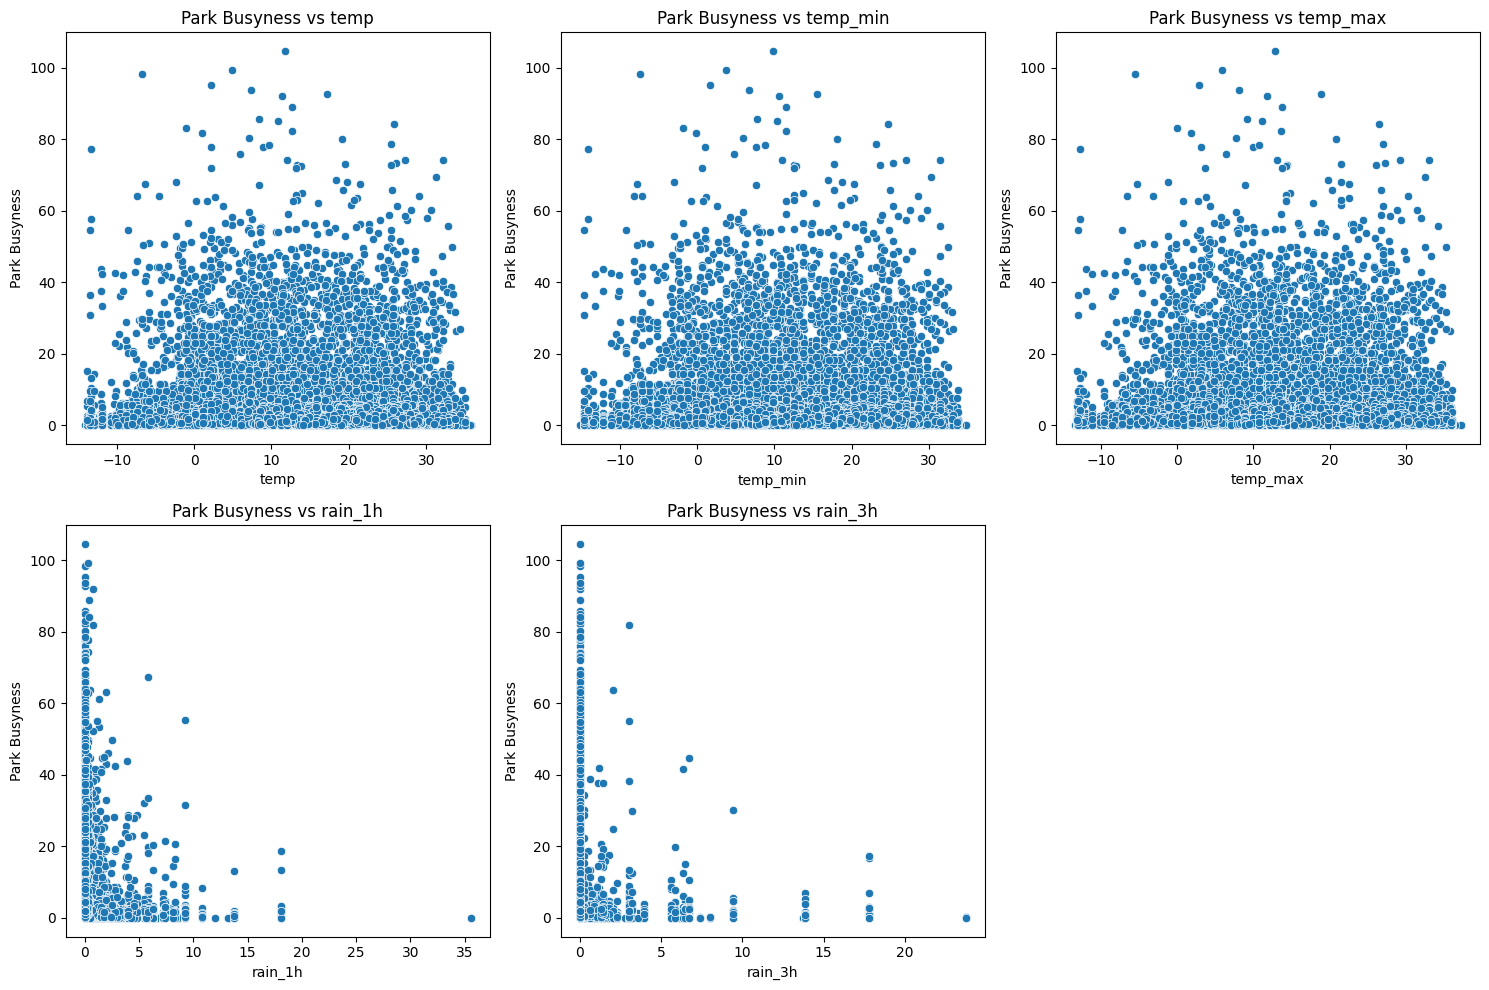

In [139]:
# Scatter plots to visualize the relationship between weather variables and park busyness
variables = ['temp', 'temp_min', 'temp_max', 'rain_1h', 'rain_3h',]

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='park_busyness', data=merged_data)
    plt.title('Park Busyness vs ' + var)
    plt.xlabel(var)
    plt.ylabel('Park Busyness')
plt.tight_layout()
plt.show()

Temperature does not appear to have a strong linear relationship with park busyness. This suggests that other factors might be influencing park attendance more significantly than temperature alone.

Rainfall seems to have a more substantial impact on park busyness. Higher levels of rainfall correlate with lower park busyness.
This makes sense as people are less likely to visit parks during rainy conditions.

In [140]:
# Save the merged_data DataFrame to a CSV file
merged_data.to_csv('parks_busyness_weather.csv', index=False)
